# 基于逻辑回归的泰坦尼克存活预测

## 一、实验简介

### （一）问题描述

泰坦尼克号是当时世界上最大的豪华客轮，被称为是“永不沉没的客轮”或是“梦幻客轮”。1912年4月10日，泰坦尼克号从英国南安普敦出发,计划中的目的地为美国的纽约,开始了这艘“梦幻客轮”的处女航。4月14日晚11点40分，泰坦尼克号在北大西洋撞上冰山，在4月15日凌晨2点20分沉没。由于缺少足够的救生艇，导致2224名乘客和机组人员中的1502人死亡。

尽管在逃生的过程中有一些运气因素的影响，但是否有某些群体的人比其他人更容易存活下来？（比如女人，孩子和上流社会的人等）。

本实验将借助乘客资料，例如姓名、年龄、性别、社会经济阶层等，使用逻辑回归算法来建立一个回答：“什么样的人更有可能幸存？”问题的预测模型。这里的预测实质就是幸存还是遇难的二分类问题，实验采用Sklearn机器学习库中的逻辑回归算法模型，并以乘客是否存活为因变量进行预测分析，最终得到乘客幸存的结果以及预测的准确率。

### （二）数据介绍
本实验中的数据集来自来自Kaggle竞赛平台的入门项目Titanic:Machine Learning from Disaster，数据集总共有891个样本数据，每个样本包含12个特征，其中，PassengerId表示样本编号；Survived表示是否幸存（1表幸存，0表示遇难），在实验中用于算法标签；其它10个特征的详细情况如下：

|特征名|特征含义|
|---|---|
|Pclass|舱位等级，分为一等舱、二等舱、三等舱|
|Name|乘客姓名|
|Sex|性别，Male或Female|
|Age|年龄|
|SibSp|兄弟姐妹、堂兄弟姐妹人数|
|Parch|父母与子女个数|
|Ticket|船票信息（上面记载着座位号）|
|Fare|票价|
|Cabin|客舱|
|Embarked|登船港口|


实验中，将数据集按8:2分成训练集和测试集。

数据集文件所在的位置“逻辑回归\titanic\train.csv”。

本实验将利用上述Titanic数据集的训练集训练逻辑回归模型，并使用测试集对训练好的模型进行预测和验证，计算模型的准确率等评价指标。

### （三）技术要求
#### 1.环境要求

（1）Python 3.x（包括Pandas、Matplotlib、Numpy和Sklearn包）。

（2）Jupyter Notebook。

（3）Windows 7及以上和Linux操作系统下运行。

#### 2.技术说明

（1）Python3.x 语言程序设计。

（2）Sklearn-0.21.3。

（3）逻辑回归算法。

## 二、实验目的

### （一）知识目标

1.理解逻辑回归的基本原理，学会对数据集进行分析。

2.掌握利用Sklearn库中的逻辑回归算法，以及该算法的使用方法。

3.学会利用逻辑回归算法对真实数据集进行分类预测的编程和调试能力。

### （二）技能目标
1.熟练掌握Sklearn库中逻辑回归的实现与调试方法。

2.进一步熟悉Python语言中Sklearn机器学习算法库的使用方法。

3.掌握数据分析及应用的流程和程序设计的方法。

### （三）素养目标
1.提高学生的数据分析能力。

2.锻炼学生应用程序设计文档的撰写能力。

3.提高学生应用程序的编码规范能力。

## 三、 实验任务

本实验主要任务是应用sklearn调用逻辑回归模块，通过将891个样本中的80%作为训练集对逻辑回归模型进行训练，并使用训练后的模型对其余20%的样本数据进行预测。  
具体的实验要求如下：  
1.数据集的观察：加载数据集，观察数据集的整体情况，并观察数据的行、列数以及各个数据的数据类型。  

2.数据可视化：绘出数据集中Cabin和标签Survived的关系图（直方图），观察这二者之间的联系，并判断是否舍弃Cabin这列特征。  

3.数据处理：综合运用独热编码、缺失值处理等方法实现数据的清洗，把数据全部变成数值型特征，之后再对特征数据进行进行处理（如缩放或标准化），以便于模型训练，减少计算量。  

4.数据集的划分：将数据集按8:2划分成训练集和测试集。

5.模型训练：用训练集对逻辑回归模型进行训练。

6.模型的评估：用测试集评估逻辑回归模型的分类预测的准确度。

## 四、实验步骤

### （一）加载相关的包

1.加载numpy、pandas等包做数据处理。 

2.加载matplotlib包做数据可视化来并分析数据。

3.从sklearn.linear_model加载LogisticRegression算法函数。

4.从sklearn.preprocessing中加载StandardScaler函数。

5.从sklearn.model_selection中加载train_test_split训练集-测试集划分的函数。

In [1]:
import numpy as np  # 数据处理包
import pandas as pd  # 文件读取包
import matplotlib.pyplot as plt  # 数据可视化包
from sklearn.preprocessing import StandardScaler  # 数据标准化
from sklearn.linear_model import LogisticRegression  # 逻辑回归模型
from sklearn.model_selection import train_test_split  # 数据划分函数

import warnings  # 警告信息函数
warnings.filterwarnings('ignore')  # 忽略警告信息

### （二）数据集的观察

（1）利用Pandas中的read_csv()方法来读取csv格式的数据文件。

In [2]:
# 加载数据文件。注意加载数据文件的方式。
train = pd.read_csv("titanic/train.csv")  # 加载训练集

（2）利用pandas中的head()函数来查看整个dataframe中的前五行数据，直观的了解数据内容。

In [3]:
train.head()  # 观察数据的前五行

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


（3）利用pandas中的info()函数来查看数据集的大小、行列规模以及数据类型等信息，以便于后续数据处理。

In [4]:
train.info()  # 观察数据的整体信息。

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


观察上述数据信息可得：  
Embarked这一列缺失了两条 ，Age这一列缺失了一百多条数据，Cabin这一列只有204条记录。由于模型训练时需要一个无缺失值的数据，后序需将这三个特征的缺失值进行处理。  

（4）利用pandas的describe()函数查看数据集的描述性统计信息。（因为有些特征是文本特征，比如Name、Sex、Ticket、Embarked，这些特征的统计信息是看不到的）。

In [5]:
train.describe()#数据集的统计数据

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


从上表结果可以得出，生存率平均值为0.383838，说明遇难人数一大半；Pclass的平均值为2.3，说明坐3等舱的乘客居多，因为通常3等舱的价格最便宜舱位；平均年龄29.7岁，有可能很多成年人带了年幼的小孩，导致平均年龄较小等等。

### （三）数据可视化

由于Cabin缺失比较多,需要具体观察此特征的内容，可以利用pandas.value_counts()函数来对Cabin这列特征的类别进行统计。

In [6]:
train.Cabin.value_counts()# 统计特征Cabin

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

通过观察特征Cabin的统计信息，很难看出问题来，数据集也没说明G6，C23， C25等这一类的信息具体代表什么意思。为了进一步的分析此特征，可以绘画出此特征的直方图进行统计。

首先利用plt.figure(figsize=(10,8))函数创建一张画布（图形实例），再利用pd.notnull()和pd.isnull()进行空值和非空值的判断，通过索引的方式获取Cabin有值和为空值的数量，并利用value_counts()函数获取相对于Survived里获救和遇难的计数，最后把获取的数据合成新的DataFrame数据，并利用pandas里自制的绘制图的函数plot()绘画出有无Cabin和Survived之间的直方图。

plt.figure()函数所使用的参数示意：

    figsize：设置画布的大小，其中10代表画布的长度，8代表画布的高度
    
plot()函数所使用的参数示意：

    kind：表示图形种类，默认为折线图（line），可以为条形图（bar），横向条形图（barh），柱状图（hist）等
    stacked：判断图片中是否有子图，True或False

pd.notnull()函数返回值为布尔型的矩阵，非空值为True，空值为False；pd.isnull()则相反。

<Figure size 720x576 with 0 Axes>

findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans.
findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans.


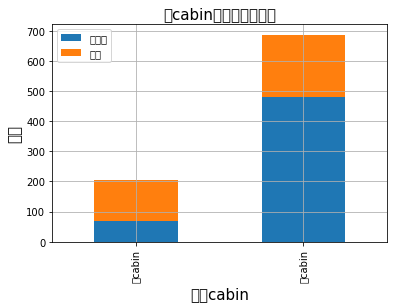

In [7]:
plt.rcParams['font.family'] = 'SimHei'  # 设置字体序列为简黑，解决plt中中文显示问题。
plt.figure(figsize=(10, 8))  # 图的长度和宽度的参数
# 获取Cabin有值的数量，并相对于Survived里获救和遇难的计数
Survived_cabin = train.Survived[pd.notnull(train.Cabin)].value_counts()
# 获取Cabin为空值的数量，并相对于Survived里获救和遇难的计数
Survived_nocabin = train.Survived[pd.isnull(train.Cabin)].value_counts()

# 把获取的数据合成新的DataFrame数据
df = pd.DataFrame({u'有cabin': Survived_cabin, u'无cabin': Survived_nocabin})
df = df.transpose()  # 对新的DataFrame数据进行转置

df.plot(kind='bar', stacked=True)  # 对数据绘制直方图，可以用来观察数据之间的关系，图的类型有kind参数指定
plt.xlabel(u'有无cabin', size=15, rotation=0)  # x轴
plt.ylabel(u'人数', size=15)  # y轴
plt.title(u'按cabin有无看获救情况', size=15)  # 为图加上标题
plt.legend((u'未获救', u'获救'), loc='best')  # 图例
plt.grid(b=True)

### （四）数据处理

（1）通过观察上面直方图，有Cabin信息的获救概率明显大于无Cabin信息,这可能意味着本来就没有这些信息就是对的，所以可以将特征Cabin制作成一列类别特征。 

制作类别特征的方法，可以通过索引分别获取有无Cabin信息的数据，并将它改写为‘Yes’和‘No’。

In [8]:
train.loc[(train.Cabin.notnull()), 'Cabin'] = "Yes"
train.loc[(train.Cabin.isnull()), 'Cabin'] = "No"

（2）对于Age这列特征，缺失值的个数并不是特别多，可以使用此列特征的mean代替缺失值，缺失值的替换可以调用fillna(mean)函数实现。

fillna()函数所使用的参数示意：

    value：用于填充缺失值
    inplace：默认值 False ，是否替换原来的内容

In [9]:
train.Age.fillna(train.Age.mean(), inplace=True)  # 对数值类型的特征的缺失值用均值填充

（3）对于Embarked特征的缺失值，可以进行众数的填充，填充的方法为fillna(train.Embarked.mode()[0])。处理完缺失值后，再利用train.isnull().sum()来统计缺失值的个数，以防数据的缺失。

In [10]:
train.Embarked.fillna(train.Embarked.mode()[0], inplace=True)#众数填充

In [11]:
train.isnull().sum()[train.isnull().sum() > 0]  # 缺失值判断

Series([], dtype: int64)

（4）由于PassengerId这一列并不是特征属性，而是数据集的一个样本编号，在数据处理时需要删除，删除此列的操作可以利用drop()函数实现。

In [12]:
# 删除数据集的样本编号列
train.drop("PassengerId", axis=1, inplace=True)  

（5）由于逻辑回归模型中需要使用数值型的特征数据，对于Name和Ticket两个文本特征，几乎每一条记录都是一个完全不同的值，无法转换成一个较好的数值特征，需要利用pandas.drop("列名")方法删掉这两列特征。

In [13]:
#删除无用特征
train.drop(["Name", "Ticket"], axis=1, inplace=True)


（6）由于独热编码解决了分类器不好处理属性数据的问题，在一定程度上也起到了扩充特征的作用。可以将Embarked，Sex，Pclass这三个离散特征和处理后的Cabin特征进行独特编码，独热编码可以利用pandas下的get_dummies(X)实现。

get_dummies()函数所使用的参数示意：

    data：array-like、Series或者DataFrame
        输入的数据
    prefix：string、含字符串的list、含字符串的dict,默认为None
        指定需要实现类别转换的列名

In [14]:
#独热编码
dummies_Cabin = pd.get_dummies(train['Cabin'], prefix='Cabin')

dummies_Embarked = pd.get_dummies(train['Embarked'], prefix='Embarked')

dummies_Sex = pd.get_dummies(train['Sex'], prefix='Sex')

dummies_Pclass = pd.get_dummies(train['Pclass'], prefix='Pclass')

# 用concat函数将这些新的属性连接到dataframe中
train = pd.concat([train, dummies_Cabin, dummies_Embarked, dummies_Sex, dummies_Pclass], axis=1)

# 再通过drop函数将原先的Pclass、Sex、Cabin和Embarked这四个属性从dataframe中去掉
train.drop(['Pclass', 'Sex', 'Cabin', 'Embarked'], axis=1, inplace=True)

（7）本实验中，由于Survived是标签，所以把它单独取出来，采用Pandas中取某一列的方法取出标签列数据。

In [15]:
y = train["Survived"]#获取标签列

获取了标签后，需要利用pandas下的drop(列名，axis=1指定为列，inplace=是否替换原来的内容)函数删除标签列。

In [16]:
X = train.drop(['Survived'], axis=1)# 删除标签列

（8）数据标准化

因为数据标准化可以降低计算量，同时不会影响逻辑回归模型预测的准确率。实验中调用Sklearn中StandardScaler().fit_transform(X)函数来对未进行处理的连续特征进行标准化。

In [17]:
#标准化特征数据
std = StandardScaler()  
X['Age'] = std.fit_transform(X['Age'].values.reshape(-1, 1))
X['Fare'] = std.fit_transform(X['Fare'].values.reshape(-1, 1))

In [18]:
X.head()  # 查看处理完后数据前五行

,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,-0.592481,1,0,-0.502445,1,0,0,0,1,0,1,0,0,1
1,0.638789,1,0,0.786845,0,1,1,0,0,1,0,1,0,0
2,-0.284663,0,0,-0.488854,1,0,0,0,1,1,0,0,0,1
3,0.407926,1,0,0.420730,0,1,0,0,1,1,0,1,0,0
4,0.407926,0,0,-0.486337,1,0,0,0,1,0,1,0,0,1


### （五）数据集的划分  
由于本实验只提供一个数据集，因此需要将数据集划分为训练集与测试集，可以采用sklearn.preprocess模块下的train_test_split(X,y，test_size=0.2)函数来划分数据集。使用训练集训练模型，用测试集测试模型的正确率，以验证模型的有效性。函数train_test_split()里参数分别代表特征，标签，测试集的百分比。

In [19]:
#划分数据集
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2)
train_X.shape, train_y.shape, test_X.shape, test_y.shape

((712, 14), (712,), (179, 14), (179,))

### （四）模型的训练、应用和评估

模型训练的具体实现步骤如下：

1.实例化sklearn.linear_model里的LogisticRegression()算法模块。

2.利用LogisticRegression().fit(train_X,train_y)函数对训练集数据进行拟合。

3.利用model.predict(test_X)函数对测试集数据进行预测。

4.利用模型里自带评估函数score(test_X, test_y)评估模型的准确度。

LogisticRegression()函数所使用的参数示意：

    C: 正则化系数λ的倒数，默认为1。
    
    penalty: 惩罚项，str类型，可选参数为l1和l2，默认为l2。penalty参数的选择会影响我们损失函数优化算法的选择，即参数solver的选择。如果是L2正则化，那么4种可选的算法{‘newton-cg’，‘lbfgs’， ‘liblinear’， ‘sag’}都可以选择，但是如果penalty是L1正则化的话，只能选择‘liblinear’。
    
    tol:迭代终止判据的误差范围，默认为1e-4。
    
    solver：优化算法选择参数，有五个可选参数，即newton-cg,lbfgs,liblinear,sag,saga。默认为liblinear。
本实验中将对LogisticRegression()函数的参数penalty取两个不同的值，以比较不同的惩罚项对算法准确率的影响，最后利用逻辑回归算法函数自带的方法score(test_X, test_y)对这两个模型的准确率进行评估。   

In [20]:
# 实例化算法LogisticRegression()
model_1 = LogisticRegression(C=1.0, tol=1e-6)
model_2 = LogisticRegression(C=1.0, tol=1e-6, solver='sag')

In [21]:
# 模型训练
model_1.fit(train_X, train_y)  
model_2.fit(train_X, train_y)

LogisticRegression(solver='sag', tol=1e-06)

In [22]:
# 用测试集测试得到预测标签
model_1.predict(test_X)  
model_2.predict(test_X) 

array([1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0])

In [23]:
# 评分
model_1.score(test_X, test_y),model_2.score(test_X, test_y)

(0.7430167597765364, 0.7430167597765364)


## 五、结果分析

本实验所需解决的是Titanic数据集的二分类问题，正好适合逻辑回归。实验实现了利用Sklearn中的逻辑回归算法模块对Titanic数据集的预测，实验分为数据的加载、数据可视化、数据处理、数据集的划分、算法模型的训练、算法的应用和评估。

本实验使用了liblinear和sag这两种优化算法的参数，最终准确率都达到了81%，并无差别。但在实际应用当中，优化算法参数liblinear比较适合于小数据集，而sag适用于大数据集，能提高模型训练时的速度。在利用机器学习算法之前，一个重要问题就是如何处理缺失数据，缺失过多的特征通常都会进行删除，而本实验是通过对该特征进行分析，将它构建成一个新特征，这个问题的解决方案并没有标准答案，它取决于实际应用中的需求。    

## 六、实验拓展

1.查找关于此数据集的相关背景知识，认真观察数据集里的数据特征，对数据进行不同的处理方式，再通过得到结果进行分析。比如：对于年龄的本身也未必是一件非常靠谱的事情，在日常生活中，小朋友和老人可能得到的照顾会多一些。这样看的话，年龄作为一个连续值，给一个固定的值，似乎体现不出两头受照顾的实际情况，所以，将年龄这列特征离散化，按区段分作类别属性会更合适一些。  

2.尝试使用不同分类算法对此数据集进行训练和预测，以对比的方式了解不同算法的优缺点。

3.通过网络资源，查找数据量较大的数据集，再使用逻辑回归对此数据集进行分析，观察逻辑回归在不同数据集上的应用能力，加深对逻辑回归的理解。